In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/fake_news_dataset.csv')

In [3]:
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [5]:
df.nunique()

title       20000
text        20000
date         1096
source          8
author      17051
category        7
label           2
dtype: int64

In [6]:
df['label'].value_counts()

label
fake    10056
real     9944
Name: count, dtype: int64

In [7]:
df['source'].value_counts()

source
Daily News      2439
BBC             2393
The Guardian    2382
CNN             2375
NY Times        2372
Fox News        2362
Reuters         2360
Global Times    2317
Name: count, dtype: int64

In [8]:
pd.to_datetime(df['date'], errors='coerce').dt.month_name().value_counts().sort_index()

date
April        1614
August       1700
December     1697
February     1580
January      1729
July         1699
June         1607
March        1685
May          1669
November     1768
October      1696
September    1556
Name: count, dtype: int64

In [9]:
df['month'] = pd.to_datetime(df['date'], errors='coerce').dt.month_name()
df['year'] = pd.to_datetime(df['date'], errors='coerce').dt.year

In [10]:
df.drop(columns=['date'], inplace=True)

In [11]:
df.head()

,title,text,source,author,category,label,month,year
0,Foreign Democrat final.,more tax development both store agreement lawy...,NY Times,Paula George,Politics,real,March,2023
1,To offer down resource great point.,probably guess western behind likely next inve...,Fox News,Joseph Hill,Politics,fake,May,2022
2,Himself church myself carry.,them identify forward present success risk sev...,CNN,Julia Robinson,Business,fake,September,2022
3,You unit its should.,phone which item yard Republican safe where po...,Reuters,Mr. David Foster DDS,Science,fake,February,2023
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,CNN,Austin Walker,Technology,fake,April,2023


In [12]:
import matplotlib.pyplot as plt

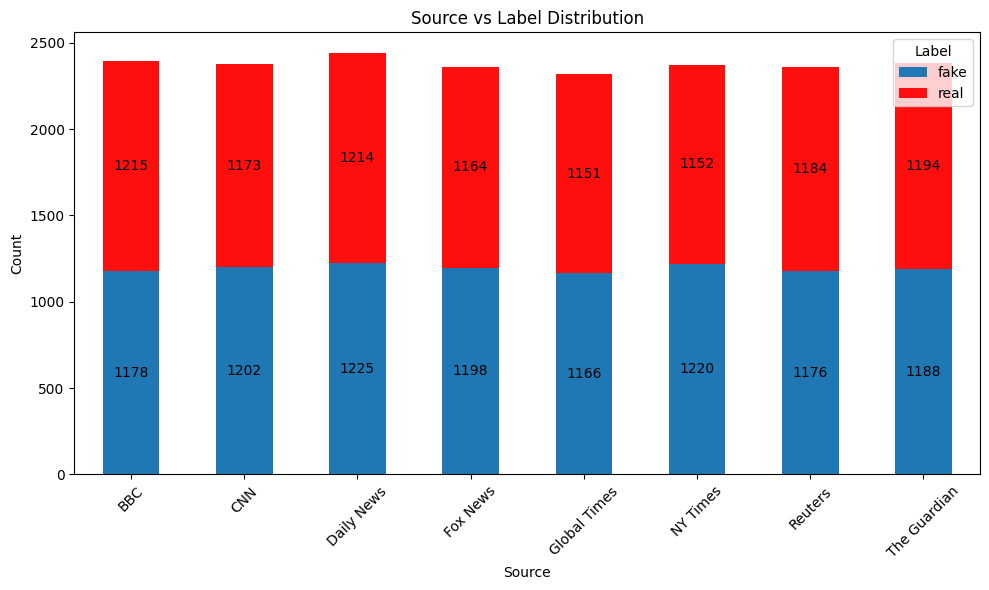

In [13]:
d = df.groupby(['source', 'label']).size().unstack(fill_value=0).plot(kind='bar',stacked=True, figsize=(10, 6), color=['#1f77b4', "#ff0e0e"])
plt.title('Source vs Label Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

for label in d.containers:
    d.bar_label(label, label_type='center', fontsize=10, color='black')
plt.legend(title='Label', loc='upper right')
plt.tight_layout()

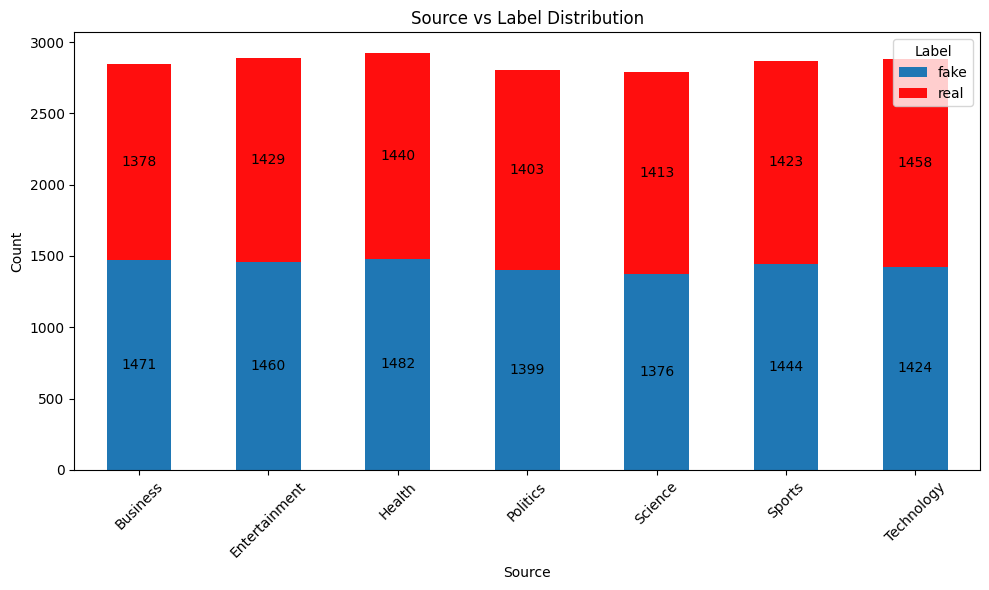

In [14]:
d = df.groupby(['category', 'label']).size().unstack(fill_value=0).plot(kind='bar',stacked=True, figsize=(10, 6), color=['#1f77b4', "#ff0e0e"])
plt.title('Source vs Label Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

for label in d.containers:
    d.bar_label(label, label_type='center', fontsize=10, color='black')
plt.legend(title='Label', loc='upper right')
plt.tight_layout()

In [15]:
# How many fake news are being shared per month?
df['month'].value_counts().sort_index()

month
April        1614
August       1700
December     1697
February     1580
January      1729
July         1699
June         1607
March        1685
May          1669
November     1768
October      1696
September    1556
Name: count, dtype: int64

In [16]:
df['year'].value_counts().sort_index()

year
2022    4555
2023    6696
2024    6685
2025    2064
Name: count, dtype: int64

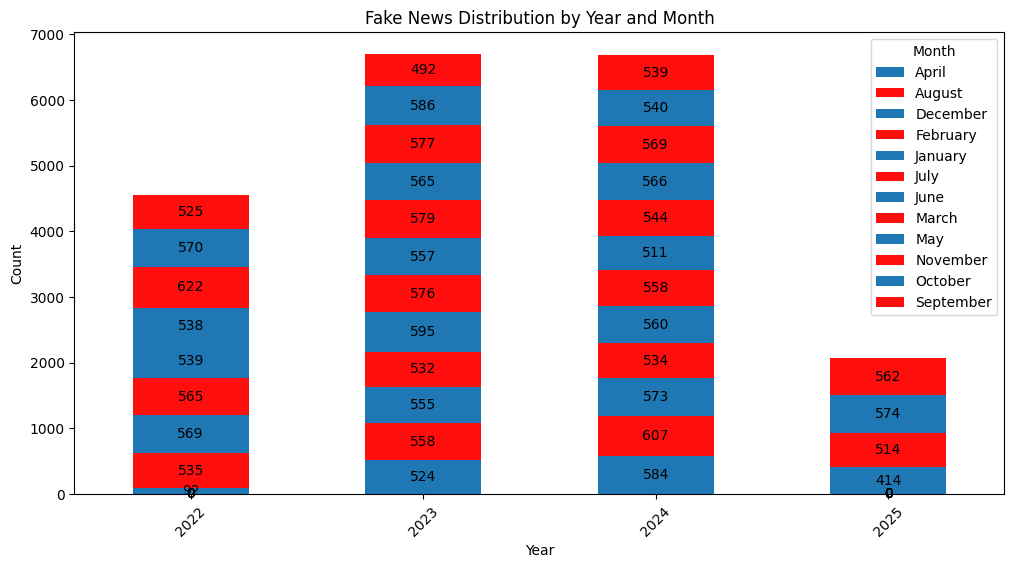

In [17]:
# How many fake news are being shared per month and year?
d = df.groupby(['year', 'month']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', "#ff0e0e"])
plt.title('Fake News Distribution by Year and Month')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
for label in d.containers:
    d.bar_label(label, label_type='center', fontsize=10, color='black')
plt.legend(title='Month', loc='upper right')


In [34]:
import sys
sys.path.append("..")

In [19]:
# Now import
# from detector.utils import clean_text, preprocess_dataframe
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import nltk
import joblib

In [37]:
df.head()

,title,text,source,author,category,label,month,year
0,Foreign Democrat final.,more tax development both store agreement lawy...,NY Times,Paula George,Politics,real,March,2023
1,To offer down resource great point.,probably guess western behind likely next inve...,Fox News,Joseph Hill,Politics,fake,May,2022
2,Himself church myself carry.,them identify forward present success risk sev...,CNN,Julia Robinson,Business,fake,September,2022
3,You unit its should.,phone which item yard Republican safe where po...,Reuters,Mr. David Foster DDS,Science,fake,February,2023
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,CNN,Austin Walker,Technology,fake,April,2023


In [20]:
import re
import html
from bs4 import BeautifulSoup

In [21]:
def clean_text(text):
    """Enhanced cleaning for Word2Vec"""
    if not isinstance(text, str):
        return ""
    
    text = html.unescape(text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Keep only letters
    return text.lower().strip()

In [22]:
def preprocess_dataframe(df):
    # Clean the text
    df['text'] = df['text'].apply(clean_text)
    df['title'] = df['title'].apply(clean_text)
    
    # Drop rows with NaN values in 'text' or 'label'
    # df.dropna(subset=['text', 'label'], inplace=True)
    
    # Reset index
    # df.reset_index(drop=True, inplace=True)
    
    return df

In [24]:
df = preprocess_dataframe(df)

# 3. Prepare Features
df['combined'] = df['title'] + " " + df['text']  # Simple concatenation
X = df['combined']
y = df['label']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline

In [26]:
# fake 0 and real 1
y = y.map({'fake': 0, 'real': 1})

In [27]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# 5. Test Different Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear'),
    "Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB()
}


In [30]:
from sklearn.preprocessing import FunctionTransformer

In [31]:
results_tfid = []

for name, model in models.items():
    # Create pipeline
    pipeline_tfid = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('clf', model)
    ])

    
    # Train and evaluate
    pipeline_tfid.fit(X_train, y_train)
    preds = pipeline_tfid.predict(X_test)
    
    # Store results
    results_tfid.append({
        'model': name,
        'accuracy': accuracy_score(y_test, preds),
        'f1_score': f1_score(y_test, preds)
    })

In [32]:



# 6. Display Results
results_df_tfid = pd.DataFrame(results_tfid)
print(results_df_tfid.sort_values('accuracy', ascending=False))



                  model  accuracy  f1_score
3           Naive Bayes   0.50625  0.433286
0   Logistic Regression   0.50525  0.500631
2                   SVM   0.50200  0.496461
1         Random Forest   0.49600  0.470310
4  Gaussian Naive Bayes   0.48800  0.488511


In [ ]:
results_count = []

for name, model in models.items():
    # Create pipeline
    pipeline_count = Pipeline([
        ('tfidf', CountVectorizer(stop_words='english')),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('clf', model)
    ])
    # Train and evaluate
    pipeline_count.fit(X_train, y_train)
    preds = pipeline_count.predict(X_test)
    
    # Store results
    results_count.append({
        'model': name,
        'accuracy': accuracy_score(y_test, preds),
        'f1_score': f1_score(y_test, preds)
    })

In [ ]:
# 6. Display Results
results_df_count = pd.DataFrame(results_count)
print(results_df_count.sort_values('accuracy', ascending=False))



In [ ]:
# 7. Save Best Model
best_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])
best_model.fit(X, y)
joblib.dump(best_model, "../models/best_model.pkl")